In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
from keras.models import load_model
import matplotlib.transforms as mtransforms

Using TensorFlow backend.


In [9]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load  dataset
dataset_test = pd.read_csv('/home/francovm/Projects/SSE/data/processed/GISB.csv', sep='\t', encoding='utf-8' )
dataset_test= dataset_test.drop(dataset_test.columns[[1, 3, 5]], axis=1)
# split into input (X) and output (Y) variables

test_X = dataset_test.drop(columns=['Events'])


#Non categorical data
test_Y = dataset_test['Events'].values


#get number of columns in training data
n_cols = test_X.shape[1]


In [10]:
test_X

,x,n,u
0,-16.61,-159.10,25.17
1,-14.99,-158.86,22.46
2,-15.46,-160.53,22.91
3,-14.62,-159.06,20.10
4,-14.13,-160.20,16.44
5,-14.29,-160.17,21.85
6,-18.51,-160.62,17.01
7,-17.08,-159.49,16.68
8,-15.09,-161.82,12.50
9,-17.06,-160.67,16.26


[]

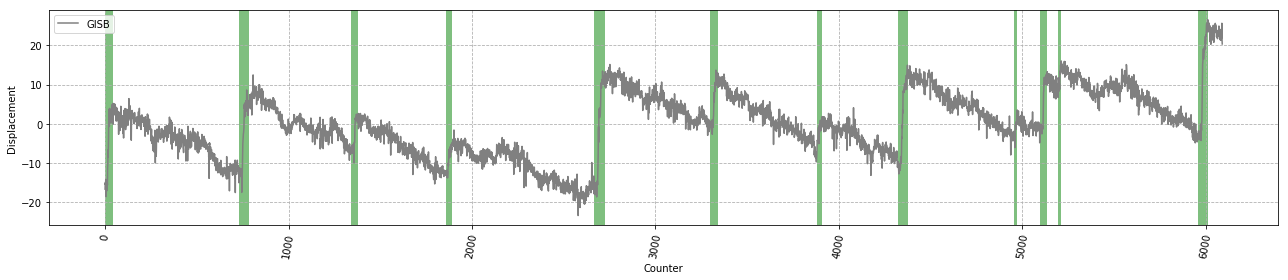

In [11]:
fig, ax = plt.subplots()

plt.plot(dataset_test['x'],'-', color='gray',label="GISB")
# plt.plot(dataset_test['Events'],'-', color='gray',label="GISB")
    # plt.plot_date(visitors2['Date'],visitors2['Visitors'].rolling(5).mean(),'g-',label="Unique Visitors- mean")

    # plt.axvline(x='2018-07-31', color='r', linestyle='--',label="CWB turn off")
plt.legend(loc=2)
plt.xticks( rotation= 80 )

    # Grids
plt.gca().xaxis.grid(True, linestyle='--')
plt.gca().yaxis.grid(True, linestyle='--')

plt.xlabel('Counter')
plt.ylabel('Displacement')
# if (dataset_test['Events'] == 0.5): plt.axhline()
    
    # Get current size
fig_size = plt.rcParams["figure.figsize"]

    # Set figure width to 18 and height to 4
fig_size[0] = 18
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size



trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
theta = 0.5
ax.fill_between(range(len(dataset_test['Events'])), min(dataset_test['Events']), max(dataset_test['Events']), where=(dataset_test['Events'] > 0.5), 
                facecolor='green',
                alpha=0.5, transform=trans) 

# plt.show()

plt.tight_layout()
plt.plot()

In [12]:
# load model
model = load_model('/home/francovm/Projects/SSE/models/NN/Binary_clasifier_NN_SSE_95.h5')
# summarize model.
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               2048      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1026      
Total params: 265,730
Trainable params: 265,730
Non-trainable params: 0
_________________________________________________________________


In [13]:
# sc = StandardScaler()
# test_X = sc.fit_transform(test_X)


In [16]:
# evaluate the model


# one-hot encode target column
test_Y = to_categorical(test_Y)

score = model.evaluate(test_X,test_Y, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

6091/6091 [==============================] - 0s 46us/step
accuracy: 91.97%


In [17]:
# y_pred[y_pred <= 0.5] = 0.
# y_pred[y_pred > 0.5] = 1.

NameError: name 'y_pred' is not defined

In [30]:
# sc = StandardScaler()
# test_X = sc.fit_transform(test_X)

ynew = model.predict_classes(test_X)
ynew

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
# ynew[ynew <= 0.5] = 0.
# ynew[ynew > 0.5] = 1.

In [29]:
ynew

array([0, 0, 0, ..., 0, 0, 0])

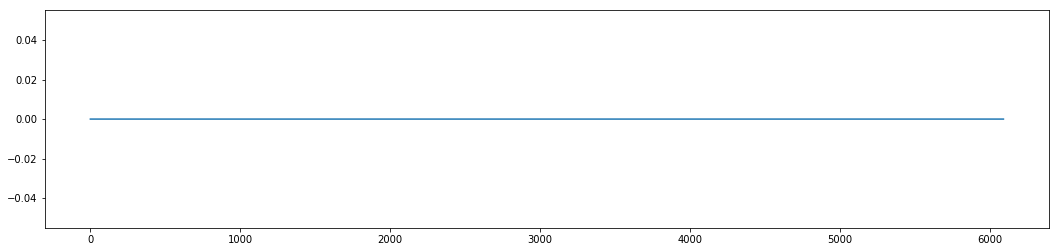

In [31]:
# plt.subplots()
plt.plot(ynew) # plotting by columns
# plt.axhline(0.5)
# plt.plot(dataset_test['x'],'-', color='gray',label="GISB")
plt.show()

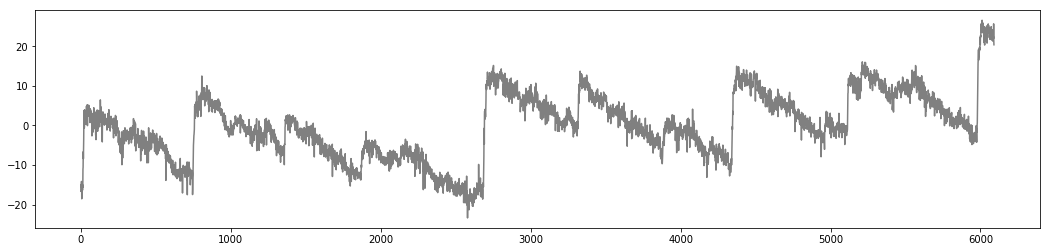

In [22]:
plt.plot(dataset_test['x'],'-', color='gray',label="GISB")
plt.show()

In [32]:
df = pd.DataFrame(data=ynew.flatten())

In [33]:
df.columns = ['Events']

In [34]:
df.head()

,Events
0,0
1,0
2,0
3,0
4,0


[]

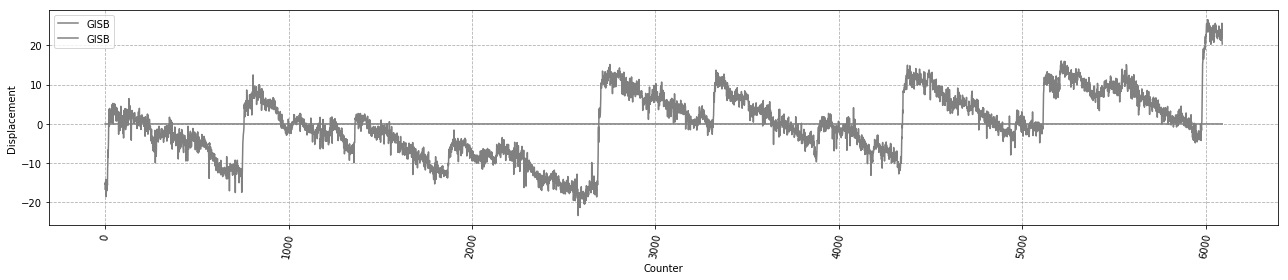

In [35]:
fig, ax = plt.subplots()

ax.plot(dataset_test['x'],'-', color='gray',label="GISB")
ax.plot(df['Events'],'-', color='gray',label="GISB")
    # plt.plot_date(visitors2['Date'],visitors2['Visitors'].rolling(5).mean(),'g-',label="Unique Visitors- mean")

    # plt.axvline(x='2018-07-31', color='r', linestyle='--',label="CWB turn off")
plt.legend(loc=2)
plt.xticks( rotation= 80 )

    # Grids
plt.gca().xaxis.grid(True, linestyle='--')
plt.gca().yaxis.grid(True, linestyle='--')

plt.xlabel('Counter')
plt.ylabel('Displacement')
# if (dataset_test['Events'] == 0.5): plt.axhline()
    
    # Get current size
fig_size = plt.rcParams["figure.figsize"]

    # Set figure width to 18 and height to 4
fig_size[0] = 18
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size



trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
theta = 0.5
ax.fill_between(range(len(dataset_test['x'])), min(dataset_test['x']), max(dataset_test['x']), where=(df['Events'] > 0.5), 
                facecolor='green',
                alpha=0.5, transform=trans) 

# plt.show()

plt.tight_layout()
plt.plot()